In [1]:
import os
import re
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import ast
import json
from glob import glob

!apt-get install -y fonts-nanum

In [2]:
import matplotlib as mpl

# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [3]:
import matplotlib    
import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
 

[]

In [4]:
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm 
path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'

os.path.isfile(path)

True

In [118]:
fontprop = fm.FontProperties(fname=path, size=12) 
font_name = fontprop.get_name()
print(font_name)
plt.rc('font', family=font_name)
#plt.rcParams["font.family"] = fontprop
plt.rcParams['font.family'] = font_name

NanumMyeongjo


Text(0, 0.5, '가격')

/home/mvlab/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/mvlab/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/mvlab/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/mvlab/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/mvlab/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/mvlab/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: 

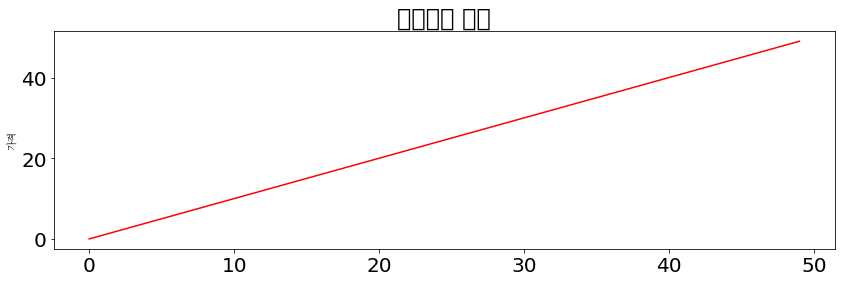

In [443]:
#fontprop = fm.FontProperties(fname=path, size=18) 
#plt.rcParams["font.family"] = path
plt.plot(range(50), 'r') 
plt.title('가격변동 추이')#, fontproperties=fontprop) 
plt.ylabel('가격', fontproperties=fontprop)

In [444]:
#padded_image_shape = (1024, 1920)
min_stride = 128
padded_image_shape = (128*4, 128*8)
anchor_k = 9
num_classes = 80#
max_data_m = 50#00
edgecolors = np.random.rand(num_classes, 3) 
edgecolors = np.minimum(edgecolors+0.1, 1.0)
#class_names = ['bg', 'pig', 'crow']
class_names_kor = ['', '모름', '돼지', '멧돼지', '큰부리까마귀', '흰배지빠귀', '유리딱새', '동고비', 
               '박새', '호랑지빠귀', '검독수리', '너구리', '설치류', '다람쥐', '사람']
class_names = ['bg','unknown', 'pig', 'boar', 'crow', 'bird_hinbejipagi', 'bird_ddaksae', 
               'bird_dongobi', 'bird_baksae', 'bird_horangjipagi', 'bird_eagle', 
               'racoon', 'rat', 'squrrel', 'human']

folder_pig = '/home/mvlab/Downloads/dataset/pig/'
os.path.isdir(folder_pig)

True

In [493]:
def add_folder_to_file_name(folder_pig, path_csv):
    path_csv = folder_pig + path_csv
    path_weight = "retinanet/pig_efficient_det_BiFPN_D3"
    print(os.path.isdir(folder_pig), os.path.isfile(path_csv))
    if os.path.isfile(path_csv):
        df = pd.read_csv(path_csv)
        df['filename'] = folder_pig + df['filename']
        print('df', df.shape, df['filename'].nunique(), df['region_attributes'].nunique()  )
        print(df['region_attributes'].unique())
        return df
    else:
        return None


In [494]:
def read_df(folder_pig, path_csv):
    path_csv = folder_pig + path_csv
    df = pd.read_csv(path_csv)
    print(df.shape)
    return df

In [566]:
df1 = read_df(folder_pig + 'object1/', 'box1.csv')
df2 = read_df(folder_pig + 'object2/', 'box2.csv')
df3 = read_df(folder_pig + 'object3/', 'box3.csv')
df4 = read_df(folder_pig + 'object4/', 'box4.csv')
df5 = read_df(folder_pig + 'object5/', 'box5.csv')

(3451, 7)
(535, 7)
(219, 7)
(6519, 7)
(1777, 7)


In [567]:
df = df4
df = pd.concat((df1, df2, df3, df4, df5), axis=0)
df.shape

(12501, 7)

In [568]:
df['region_attributes'].unique()

array(['{"class":"돼지"}', '{"class":"사람"}', '{"class":"모름"}', '{}',
       '{"class":"멧돼지"}', '{"class":"흰배지빠귀"}', '{"class":"큰부리까마귀"}',
       '{"class":"다람쥐"}', '{"class":"호랑지빠귀"}', '{"class":"설치류"}',
       '{"class":"유리딱새"}', '{"class":undefined}', '{"class":"너구리"}'],
      dtype=object)

In [569]:
df.columns

Index(['filename', 'file_size', 'file_attributes', 'region_count', 'region_id',
       'region_shape_attributes', 'region_attributes'],
      dtype='object')

In [570]:
df = df.drop(columns=['file_size','file_attributes','region_count','region_id','region_shape_attributes'])

In [571]:
df = df.reset_index()
df = df.drop(columns='index')

In [572]:
df

,filename,region_attributes
0,geomex-pig01_2020-09-03_125416_temp-19.70_wat-...,"{""class"":""돼지""}"
1,geomex-pig01_2020-09-03_125416_temp-19.70_wat-...,"{""class"":""사람""}"
2,geomex-pig01_2020-09-03_125706_temp-19.80_wat-...,"{""class"":""사람""}"
3,geomex-pig01_2020-09-03_125706_temp-19.80_wat-...,"{""class"":""사람""}"
4,geomex-pig01_2020-09-03_125956_temp-20.70_wat-...,"{""class"":""사람""}"
...,...,...
12496,geomex-pig05_2020-10-30_130601_temp-14.90_wat-...,"{""class"":""돼지""}"
12497,geomex-pig05_2020-11-01_120825_temp-10.00_wat-...,"{""class"":""큰부리까마귀""}"
12498,geomex-pig05_2020-11-01_120825_temp-10.00_wat-...,"{""class"":""돼지""}"
12499,geomex-pig05_2020-11-01_120825_temp-10.00_wat-...,"{""class"":""돼지""}"


In [573]:
def load_predict_label():
    csvs = '/home/mvlab/Downloads/dataset/pig/*.csv'
    list_csv = glob(csvs)
    print('list_csv', len(list_csv))
    list_df = []
    for csv in list_csv:
        df = pd.read_csv(csv)
        print(df.shape)
        list_df.append(df)
    
    df_con = pd.concat(list_df, axis=0)
    print('nan', df_con.isna().sum().sum())
    df_con = df_con.dropna()
    df_con = df_con.iloc[:, 1:]
    # {"class":"큰부리까마귀"}
    filename = 'filename'
    region_attributes = 'region_attributes'
        
    df_con.columns = [filename,region_attributes]
    
    print('cls', df_con[region_attributes].values)
   
    print('columns', df_con.columns)
    cls_name = df_con[region_attributes]
                    
    df_con[region_attributes] = '{"class":"'+cls_name + '"}'
    
    return df_con

df_h = load_predict_label()
df_h.head()

list_csv 5
(26396, 3)
(51085, 3)
(33826, 3)
(26018, 3)
(42160, 3)
nan 4
cls ['멧돼지' '설치류' '멧돼지' ... '너구리' '큰부리까마귀' '설치류']
columns Index(['filename', 'region_attributes'], dtype='object')


,filename,region_attributes
0,geomex-pig02_2020-11-01_000713_temp-10.20_wat-...,"{""class"":""멧돼지""}"
1,geomex-pig02_2020-11-01_000713_temp-10.20_wat-...,"{""class"":""설치류""}"
2,geomex-pig02_2020-11-01_001110_temp-10.40_wat-...,"{""class"":""멧돼지""}"
3,geomex-pig02_2020-11-01_001110_temp-10.40_wat-...,"{""class"":""설치류""}"
4,geomex-pig02_2020-11-01_001508_temp-10.50_wat-...,"{""class"":""멧돼지""}"


In [574]:
df_h.iloc[0,0]

'geomex-pig02_2020-11-01_000713_temp-10.20_wat-97.10.jpg'

In [575]:
print(df.shape, df_h.shape)
df = pd.concat((df, df_h), axis=0)
print(df.shape)

(12501, 2) (179481, 2)
(191982, 2)


In [576]:
df = df.reset_index().drop(columns='index')

In [577]:
df['site'] = 0
df['date'] = 0
df['temp'] = 0
df['wat'] = None

In [578]:
pre = 'geomex-pig'

for i in range(len(df)):
    filename = df.loc[i, 'filename']
    region_attributes = df.loc[i, 'region_attributes']
    if i%1000 == 0:
        print(len(df), i)
    if '(' in filename:        
        continue
    
    try:
        context = filename[len(pre) : -4]
        if not '_' in context:            
            continue
            
        contexts = context.split('_')
        if i==0:
            print('context', contexts)
        site = contexts[0]
        date = contexts[1]
        time = contexts[2]
        temp = contexts[3]
        wat = contexts[4]

        temp = temp.split('-')[-1]
        wat = wat.split('-')[-1]
    
        df.loc[i, 'site'] = int(site)
        df.loc[i, 'date'] = date+' '+time
        df.loc[i, 'temp'] = float(temp)
        df.loc[i, 'wat'] = float(wat)
    except:
        print('except', contexts)
        break
        
    region_attributes = ast.literal_eval(region_attributes)
    if len(region_attributes) > 0:
        cls = region_attributes['class']
        if cls in class_names_kor:
            cls_index = class_names_kor.index(cls)
            cls = class_names[cls_index]
            df.loc[i, 'region_attributes'] = cls
            if cls == 'human':
                df.loc[i, 'region_attributes'] = None
    else:
        print('unknown', i, region_attributes)
        df.loc[i, 'region_attributes'] = None           


191982 0
context ['01', '2020-09-03', '125416', 'temp-19.70', 'wat-85.80']
unknown 40 {}
unknown 41 {}
unknown 75 {}
unknown 123 {}
unknown 153 {}
unknown 168 {}
unknown 303 {}
unknown 553 {}
unknown 554 {}
unknown 689 {}
unknown 928 {}
191982 1000
unknown 1058 {}
unknown 1094 {}
unknown 1165 {}
unknown 1375 {}
unknown 1438 {}
unknown 1513 {}
unknown 1683 {}
unknown 1703 {}
unknown 1855 {}
unknown 1862 {}
unknown 1923 {}
191982 2000
unknown 2294 {}
unknown 2335 {}
unknown 2846 {}
unknown 2847 {}
unknown 2848 {}
unknown 2849 {}
unknown 2850 {}
unknown 2851 {}
unknown 2852 {}
unknown 2853 {}
unknown 2854 {}
unknown 2855 {}
unknown 2856 {}
unknown 2857 {}
unknown 2858 {}
unknown 2859 {}
unknown 2860 {}
unknown 2861 {}
unknown 2862 {}
unknown 2863 {}
unknown 2864 {}
unknown 2865 {}
unknown 2866 {}
unknown 2867 {}
unknown 2868 {}
unknown 2869 {}
unknown 2870 {}
unknown 2871 {}
unknown 2872 {}
unknown 2873 {}
unknown 2874 {}
unknown 2875 {}
unknown 2876 {}
unknown 2877 {}
unknown 2878 {}
unk

unknown 3332 {}
unknown 3333 {}
unknown 3334 {}
unknown 3335 {}
unknown 3336 {}
unknown 3337 {}
unknown 3338 {}
unknown 3339 {}
unknown 3340 {}
unknown 3341 {}
unknown 3342 {}
unknown 3343 {}
unknown 3344 {}
unknown 3345 {}
unknown 3346 {}
unknown 3347 {}
unknown 3348 {}
unknown 3349 {}
unknown 3350 {}
unknown 3351 {}
unknown 3352 {}
unknown 3353 {}
unknown 3354 {}
unknown 3355 {}
unknown 3356 {}
unknown 3357 {}
unknown 3358 {}
unknown 3359 {}
unknown 3360 {}
unknown 3361 {}
unknown 3362 {}
unknown 3363 {}
unknown 3364 {}
unknown 3365 {}
unknown 3366 {}
unknown 3367 {}
unknown 3368 {}
unknown 3369 {}
unknown 3370 {}
unknown 3371 {}
unknown 3372 {}
unknown 3373 {}
unknown 3374 {}
unknown 3375 {}
unknown 3376 {}
unknown 3377 {}
unknown 3378 {}
unknown 3379 {}
unknown 3380 {}
unknown 3381 {}
unknown 3382 {}
unknown 3383 {}
unknown 3384 {}
unknown 3385 {}
unknown 3386 {}
unknown 3387 {}
unknown 3388 {}
unknown 3389 {}
unknown 3390 {}
unknown 3391 {}
unknown 3392 {}
unknown 3393 {}
unknown 

191982 28000
191982 29000
191982 30000
191982 31000
191982 32000
191982 33000
191982 34000
191982 35000
191982 36000
191982 37000
191982 38000
191982 39000
191982 40000
191982 41000
191982 42000
191982 43000
191982 44000
191982 45000
191982 46000
191982 47000
191982 48000
191982 49000
191982 50000
191982 51000
191982 52000
191982 53000
191982 54000
191982 55000
191982 56000
191982 57000
191982 58000
191982 59000
191982 60000
191982 61000
191982 62000
191982 63000
191982 64000
191982 65000
191982 66000
191982 67000
191982 68000
191982 69000
191982 70000
191982 71000
191982 72000
191982 73000
191982 74000
191982 75000
191982 76000
191982 77000
191982 78000
191982 79000
191982 80000
191982 81000
191982 82000
191982 83000
191982 84000
191982 85000
191982 86000
191982 87000
191982 88000
191982 89000
191982 90000
191982 91000
191982 92000
191982 93000
191982 94000
191982 95000
191982 96000
191982 97000
191982 98000
191982 99000
191982 100000
191982 101000
191982 102000
191982 103000
191982 1

In [581]:
print(df.isna().sum().sum())
df = df.dropna()
print(df.shape)

0
(177881, 6)


In [582]:
df.to_csv('all.csv')

In [6]:
df = pd.read_csv('all.csv')

In [18]:
df.columns

Index(['Unnamed: 0', 'cls', 'site', 'date', 'temp', 'wat'], dtype='object')

In [20]:
df['Unnamed: 0'].nunique()

177881

In [76]:
df = df.drop(columns='Unnamed: 0')

KeyError: "['Unnamed: 0'] not found in axis"

In [88]:
df['cls'].nunique(), df['cls'].unique()

(16,
 array(['pig', 'unknown', 'boar', 'bird_hinbejipagi', 'crow', 'squrrel',
        'horangjipagi', 'rat', 'ddaksae', 'racoon', 'dongobi', 'eagle',
        'cat', 'dog', 'bird_baksae', 'car'], dtype=object))

In [89]:
df = df.replace({'bird_hinbejipagi':"hinbejipagi", 
                 'bird_horangjipagi':'horangjipagi',
                 'bird_ddaksae':'ddaksae',
                 'bird_dongobi':'dongobi',
                 'bird_baksae':'baksae',
                 'bird_eagle':'eagle'})

In [40]:
df = df.replace({'{"class":"고양이"}':'cat', '{"class":"개"}':'dog',
           '{"class":"오소리"}':'racoon','{"class":"car"}':'car'})

In [90]:
df['cls'].nunique(), df['cls'].unique()

(16,
 array(['pig', 'unknown', 'boar', 'hinbejipagi', 'crow', 'squrrel',
        'horangjipagi', 'rat', 'ddaksae', 'racoon', 'dongobi', 'eagle',
        'cat', 'dog', 'baksae', 'car'], dtype=object))

In [91]:
!ls

 all.csv			        predict1.csv
'animal_v0.51 efficient-det-D7.ipynb'   predict2.csv
 pig_analysis.ipynb		        predict3.csv
 pig_check.ipynb		        predict4.csv
 pig_v0.0_EfficientNetD3.ipynb	        predict6.csv
 pig_v0.1_EfficientNetD2_dual.ipynb     retinanet


In [92]:
df.head()

,cls,site,date,temp,wat
0,pig,1,2020-09-03 12:54:16,19.7,85.8
1,pig,1,2020-09-03 12:59:56,20.7,81.0
2,pig,1,2020-09-03 13:02:46,21.2,81.5
3,pig,1,2020-09-03 13:05:36,21.2,75.3
4,pig,1,2020-09-03 13:08:27,21.8,78.6


In [93]:
df = df.rename(columns={'region_attributes':'cls'})
#df = df.drop(columns='filename')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H%M%S')

In [94]:
df.head()

,cls,site,date,temp,wat
0,pig,1,2020-09-03 12:54:16,19.7,85.8
1,pig,1,2020-09-03 12:59:56,20.7,81.0
2,pig,1,2020-09-03 13:02:46,21.2,81.5
3,pig,1,2020-09-03 13:05:36,21.2,75.3
4,pig,1,2020-09-03 13:08:27,21.8,78.6


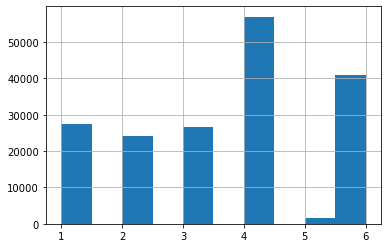

In [95]:
df['site'].hist()

df = df.set_index('date')

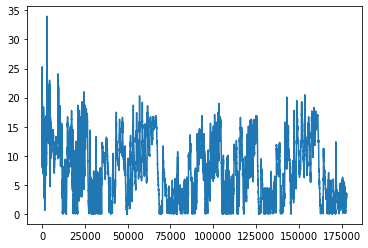

In [96]:
df['temp'].plot()

In [97]:
df_hot = pd.get_dummies(df.drop(columns=['temp','wat']), prefix='', prefix_sep='')
cls_hot = df_hot.groupby('date').sum().drop(columns='site')#.iloc[:, 1:]

In [98]:
cls_hot

,baksae,boar,car,cat,crow,ddaksae,dog,dongobi,eagle,hinbejipagi,horangjipagi,pig,racoon,rat,squrrel,unknown
date,,,,,,,,,,,,,,,,
2020-08-28 13:35:13,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2
2020-08-28 13:37:13,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2020-08-30 18:22:10,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2020-08-30 18:25:19,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2020-08-30 18:27:51,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-30 23:54:04,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2020-11-30 23:56:11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-11-30 23:56:59,0,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0


In [99]:
df_hot.groupby('site').mean()

,baksae,boar,car,cat,crow,ddaksae,dog,dongobi,eagle,hinbejipagi,horangjipagi,pig,racoon,rat,squrrel,unknown
site,,,,,,,,,,,,,,,,
1,0.000036,0.431708,0.000036,0.000000,0.211339,0.003678,0.000000,0.000000,0.000000,0.108910,0.000765,0.007902,0.113789,0.120781,0.000073,0.000983
2,0.000000,0.320416,0.000000,0.000000,0.335975,0.002889,0.000000,0.000000,0.000000,0.100986,0.000206,0.009079,0.144319,0.083406,0.000000,0.002724
3,0.003271,0.289538,0.000113,0.000000,0.245179,0.007143,0.000940,0.000075,0.000075,0.116011,0.000338,0.042141,0.270591,0.020037,0.000150,0.004398
4,0.000000,0.415420,0.000000,0.000035,0.364278,0.008974,0.000018,0.000158,0.000018,0.006094,0.000386,0.000369,0.194292,0.009589,0.000018,0.000351
5,0.000000,0.262244,0.000000,0.000000,0.090515,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.210167,0.415995,0.000000,0.000000,0.021079
6,0.000000,0.382960,0.000000,0.000024,0.299271,0.009285,0.000000,0.000073,0.000000,0.070285,0.000195,0.010065,0.167012,0.060829,0.000000,0.000000


best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

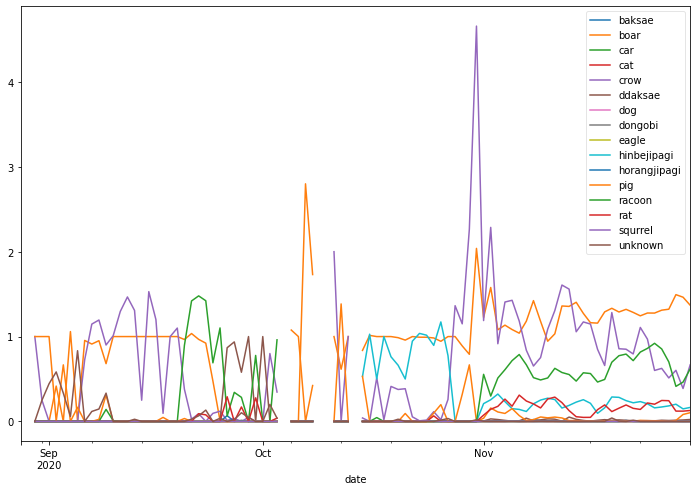

In [100]:
ax = cls_hot.resample('D').mean().plot(figsize=(12,8))
ax.legend(loc='best', fancybox=True, framealpha=0.5, bbox_to_anchor=(1,1))

findfont: Font family ['NanumMyeongjo'] not found. Falling back to DejaVu Sans.


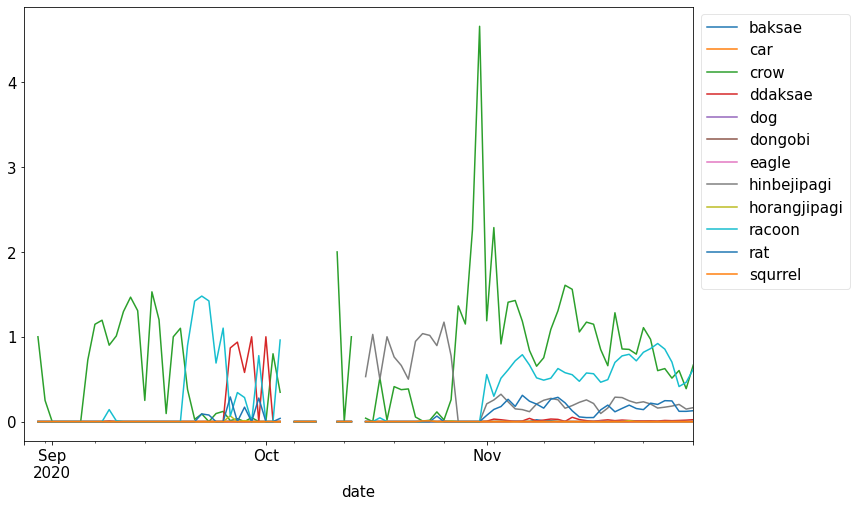

In [125]:
import matplotlib
font = {'weight' : 'normal',
        'size'   : 15}

matplotlib.rc('font', **font)

ax = cls_hot.drop(columns=['cat','unknown','pig','boar']).resample('D').mean().plot(figsize=(12,8))
ax.legend(loc='best', fancybox=True, framealpha=0.5, bbox_to_anchor=(1,1))

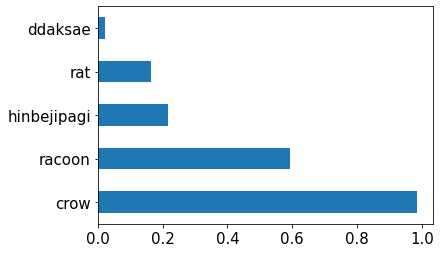

In [128]:
ax = cls_hot.drop(columns=['cat','unknown','pig','boar']).mean().nlargest(5).plot.barh()

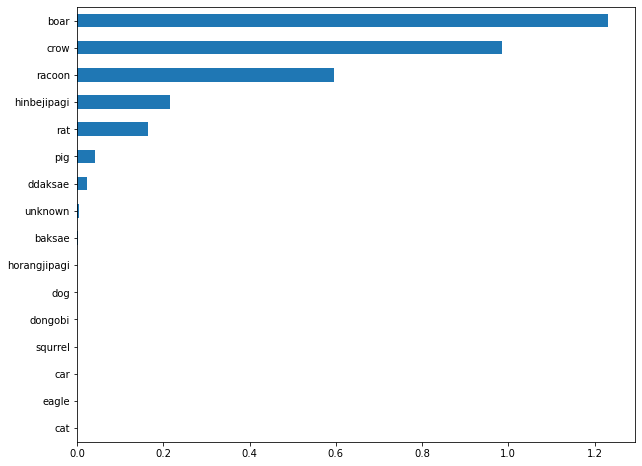

In [101]:
ax = cls_hot.mean().sort_values().plot.barh(figsize=(10,8))

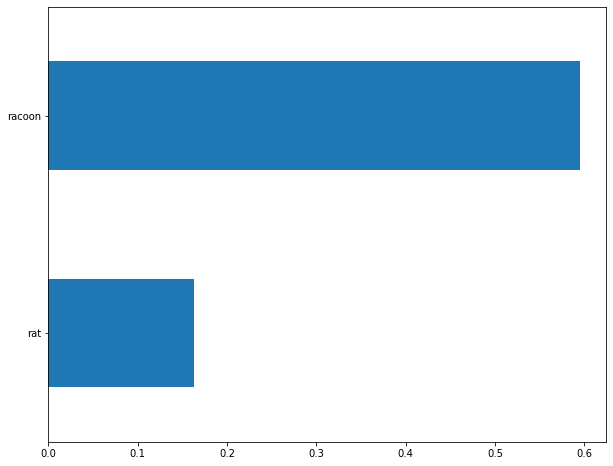

In [73]:
ax = cls_hot[['racoon','rat']].mean().sort_values().plot.barh(figsize=(10,8))

In [66]:
df.resample('D').mean().plot()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

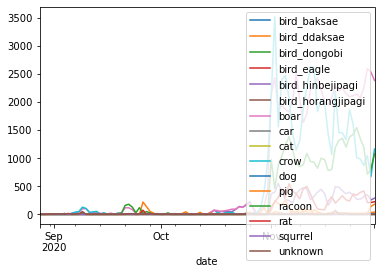

In [67]:
cls_hot.resample('D').sum().plot()

<ipython-input-195-1b7d573c1c17>:1: RuntimeWarning: divide by zero encountered in log
  np.log(cls_hot.resample('D').sum()).plot()


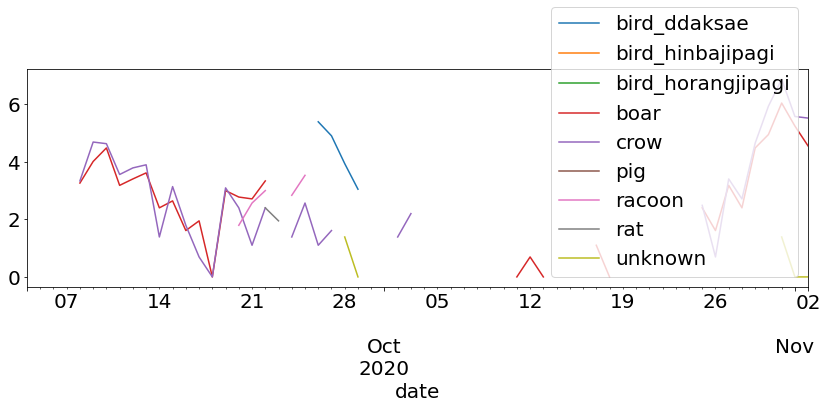

In [195]:
np.log(cls_hot.resample('D').sum()).plot()

In [164]:
df.set_index('date')['2020-10-01':'2020-10-13'].sample(5)

KeyError: "None of ['date'] are in the columns"